<a href="https://colab.research.google.com/github/lucasferreiraos/quarentenadados-alura/blob/master/Quarentenadados_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

avaliacoes.columns = ['usuarioId', 'filmeId', 'avaliacao', 'momento']
filmes.columns = ['filmeId', 'titulo', 'genero']

In [ ]:
avaliacoes.head()

,usuarioId,filmeId,avaliacao,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].mean()
filmes = filmes.join(notas_medias_por_filme, on='filmeId')
filmes.rename(columns={'avaliacao': 'mediaAvaliacao'}, inplace=True)
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
total_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].count()
filmes = filmes.join(total_avaliacoes_por_filme, on='filmeId')
filmes = filmes.rename(columns={'avaliacao': 'totalAvaliacoes'})
filmes['totalAvaliacoes'] = filmes['totalAvaliacoes'].fillna(-1).astype(int)

In [ ]:
decimals = 2
filmes['mediaAvaliacao'] = filmes['mediaAvaliacao'].apply(lambda x: round(x, decimals))
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio 01: Rotacionar os ticks (os nomes dos gêneros)


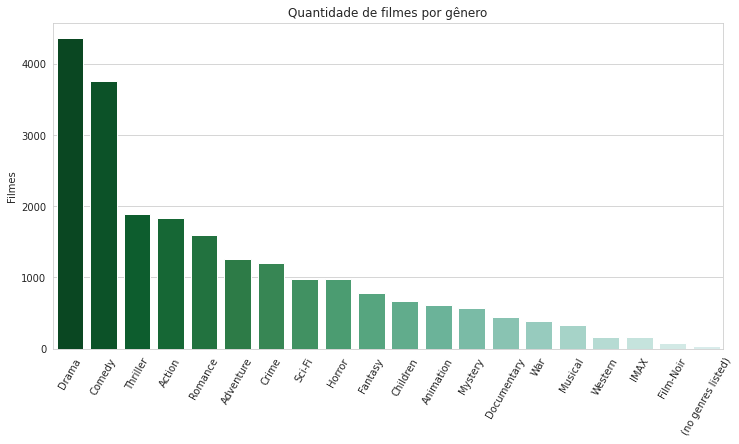

In [ ]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.title("Quantidade de filmes por gênero")

my_bar = sns.barplot(
    x=filmes_por_genero.index,
    y=filmes_por_genero.values,
    palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero)+4),
)
my_bar.set(ylabel='Filmes')
plt.xticks(rotation=60)
plt.show()

## Desafio 02: Comparar outros filmes com notas próximas e achar distribuições bem diferentes

A primeira coisa que decidi fazer foi observar uma parcela dos dados de forma ordenada a fim de facilitar a escolha dos filmes que eu faria a comparação.

In [ ]:
filmes[50:100].sort_values(by='mediaAvaliacao', ascending=False)

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.00,2
98,111,Taxi Driver (1976),Crime|Drama|Thriller,4.11,104
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,4.03,37
97,110,Braveheart (1995),Action|Drama|War,4.03,237
50,55,Georgia (1995),Drama,4.00,1
94,106,Nobody Loves Me (Keiner liebt mich) (1994),Comedy|Drama,4.00,1
66,74,Bed of Roses (1996),Drama|Romance,4.00,8
69,77,Nico Icon (1995),Documentary,4.00,1
72,80,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama,4.00,2
96,108,Catwalk (1996),Documentary,4.00,1


E em seguida plotei os gráficos dos filmes que escolhi comparar entre si.

In [ ]:
bootle_rocket = avaliacoes.query('filmeId == 101')['avaliacao']
friday = avaliacoes.query('filmeId == 69')['avaliacao']

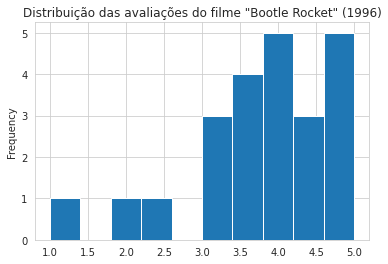

Total de avaliações: 23


In [ ]:
plt.title('Distribuição das avaliações do filme "Bootle Rocket" (1996)')
bootle_rocket.plot(kind='hist')
plt.show()
print(f"Total de avaliações: {len(bootle_rocket)}")

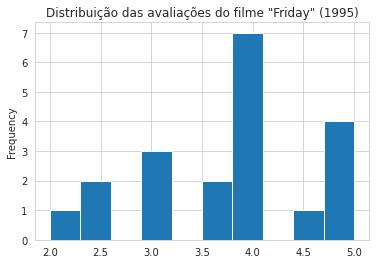

Total de avaliações: 20


In [ ]:
plt.title('Distribuição das avaliações do filme "Friday" (1995)')
friday.plot(kind='hist')
plt.show()
print(f"Total de avaliações: {len(friday)}")

## Desafio 03: Criar o boxplot dos 10 filmes mais votados (não é com maior média, é com mais votos!)

In [ ]:
top_10 = filmes.sort_values(by='totalAvaliacoes', ascending=False).head(10)
top_10

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238
97,110,Braveheart (1995),Action|Drama|War,4.03,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224
461,527,Schindler's List (1993),Drama|War,4.22,220


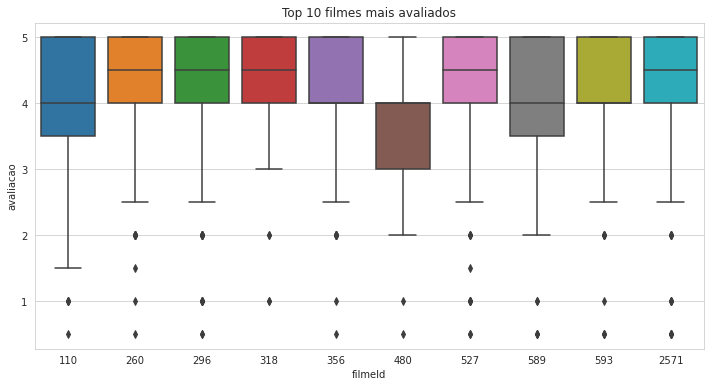

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 filmes mais avaliados')
filmes_mais_avaliados = avaliacoes.query(f'filmeId in [356,318,296,593,2571,260,480,110,589,527]')
sns.boxplot(data=filmes_mais_avaliados, x='filmeId', y='avaliacao')
plt.show()

## Desafio 04: O boxplot estar num tamanho adequado e com os NOMES dos filmes nos ticks

In [ ]:
ticks_list = [name[:-7] for name in top_10['titulo']]
ticks_list
flw = {}

['Forrest Gump',
 'Shawshank Redemption, The',
 'Pulp Fiction',
 'Silence of the Lambs, The',
 'Matrix, The',
 'Star Wars: Episode IV - A New Hope',
 'Jurassic Park',
 'Braveheart',
 'Terminator 2: Judgment Day',
 "Schindler's List"]

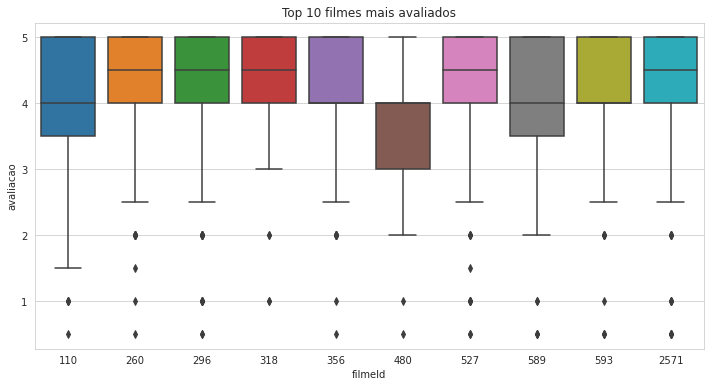

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 filmes mais avaliados')
filmes_mais_avaliados = avaliacoes.query(f'filmeId in [356,318,296,593,2571,260,480,110,589,527]')
sns.boxplot(data=filmes_mais_avaliados, x='filmeId', y='avaliacao')
#plt.xlabel(ticks_list)
plt.show()

In [ ]:
filmes_mais_avaliados

,usuarioId,filmeId,avaliacao,momento
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99573,610,589,5.0,1479542983
99575,610,593,4.5,1479545819


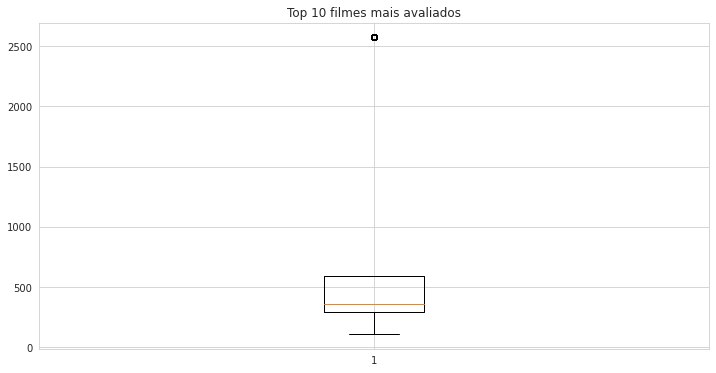

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 filmes mais avaliados')
plt.boxplot(x=filmes_mais_avaliados, labels=filmes_mais_avaliados[''])
plt.show()

## Desafio 05: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5

In [ ]:
filmes.query('(mediaAvaliacao >= 4.5 and mediaAvaliacao <= 5) and totalAvaliacoes > 3').sort_values(by='mediaAvaliacao', ascending=False).head(20)

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,4.90,5
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.75,8
9570,174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,4.75,4
4782,7121,Adam's Rib (1949),Comedy|Romance,4.75,4
2424,3224,Woman in the Dunes (Suna no onna) (1964),Drama,4.75,4
5773,31364,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,4.70,5
1664,2239,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama,4.67,6
6573,55167,Tekkonkinkreet (Tekkon kinkurîto) (2006),Action|Adventure|Animation|Crime|Fantasy,4.62,4
6120,43376,Sophie Scholl: The Final Days (Sophie Scholl -...,Drama|War,4.62,4
6022,38304,No Direction Home: Bob Dylan (2005),Documentary,4.62,4


In [ ]:
filmes.query('filmeId == 1041')

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
796,1041,Secrets & Lies (1996),Drama,4.59,11


In [ ]:
filme_1760 = avaliacoes.query('filmeId == 1760')['avaliacao']
print('Centralidades do filme "Spice World"')
print(f'Média: {filme_1760.mean()}')
print(f'Mediana: {filme_1760.median()}')
print(f'Moda: {filme_1760.mode()[0]}')

Centralidades do filme "Spice World"
Média: 1.35
Mediana: 1.0
Moda: 0.5


In [ ]:
filme_312 = avaliacoes.query('filmeId == 312')['avaliacao']
print('Centralidades do filme "Stuart Saves His Family"')
print(f'Média: {filme_312.mean()}')
print(f'Mediana: {filme_312.median()}')
print(f'Moda: {filme_312.mode()[0]}')

Centralidades do filme "Stuart Saves His Family"
Média: 1.4444444444444444
Mediana: 1.0
Moda: 1.0


In [ ]:
filme_380 = avaliacoes.query('filmeId == 380')['avaliacao']
print('Centralidades do filme "True Lies"')
print(f'Média: {filme_380.mean()}')
print(f'Mediana: {filme_380.median()}')
print(f'Moda: {filme_380.mode()[0]}')

Centralidades do filme "True Lies"
Média: 3.497191011235955
Mediana: 3.5
Moda: 3.0


In [ ]:
filme_368 = avaliacoes.query('filmeId == 368')['avaliacao']
print('Centralidades do filme "Maverick"')
print(f'Média: {filme_368.mean()}')
print(f'Mediana: {filme_368.median()}')
print(f'Moda: {filme_368.mode()[0]}')

Centralidades do filme "Maverick"
Média: 3.5
Mediana: 3.5
Moda: 4.0


In [ ]:
filme_1178 = avaliacoes.query('filmeId == 1178')['avaliacao']
print('Centralidades do filme "Paths of Glory"')
print(f'Média: {filme_1178.mean()}')
print(f'Mediana: {filme_1178.median()}')
print(f'Moda: {filme_1178.mode()[0]}')

Centralidades do filme "Paths of Glory"
Média: 4.541666666666667
Mediana: 4.75
Moda: 5.0


In [ ]:
filme_1041 = avaliacoes.query('filmeId == 1041')['avaliacao']
print('Centralidades do filme "Secrets & Lies"')
print(f'Média: {filme_1041.mean()}')
print(f'Mediana: {filme_1041.median()}')
print(f'Moda: {filme_1041.mode()[0]}')

Centralidades do filme "Secrets & Lies"
Média: 4.590909090909091
Mediana: 5.0
Moda: 5.0


## Desafio 06: Plotar o boxplot e o histograma de um determinado filme um do lado do outro (no mesmo gráfico ou em gráficos distintos)